In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import re

In [50]:
#!wget -O fifa_data.csv https://raw.githubusercontent.com/pramodG44/DSC/master/fifa_data.csv?token=AM5SYLW27DY2H7FZLGA5YRC5ONZFW

In [91]:
fifa = pd.read_csv('C:/Users/pramo/Desktop/IDeators/Python/fifa_data.csv')

In [92]:
fifa['International Reputation'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    4.0
Name: International Reputation, dtype: float64

In [53]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [54]:
overall = pd.DataFrame(fifa['Overall'].value_counts())
overall.sort_index(axis = 0,inplace=True)


In [55]:
overall.head()

,Overall
46,1
47,20
48,32
49,36
50,103


In [56]:
overall.reset_index(inplace = True)
overall.columns  = ['overall', 'Total']
overall.head()

,overall,Total
0,46,1
1,47,20
2,48,32
3,49,36
4,50,103


# Bar plot for overall 

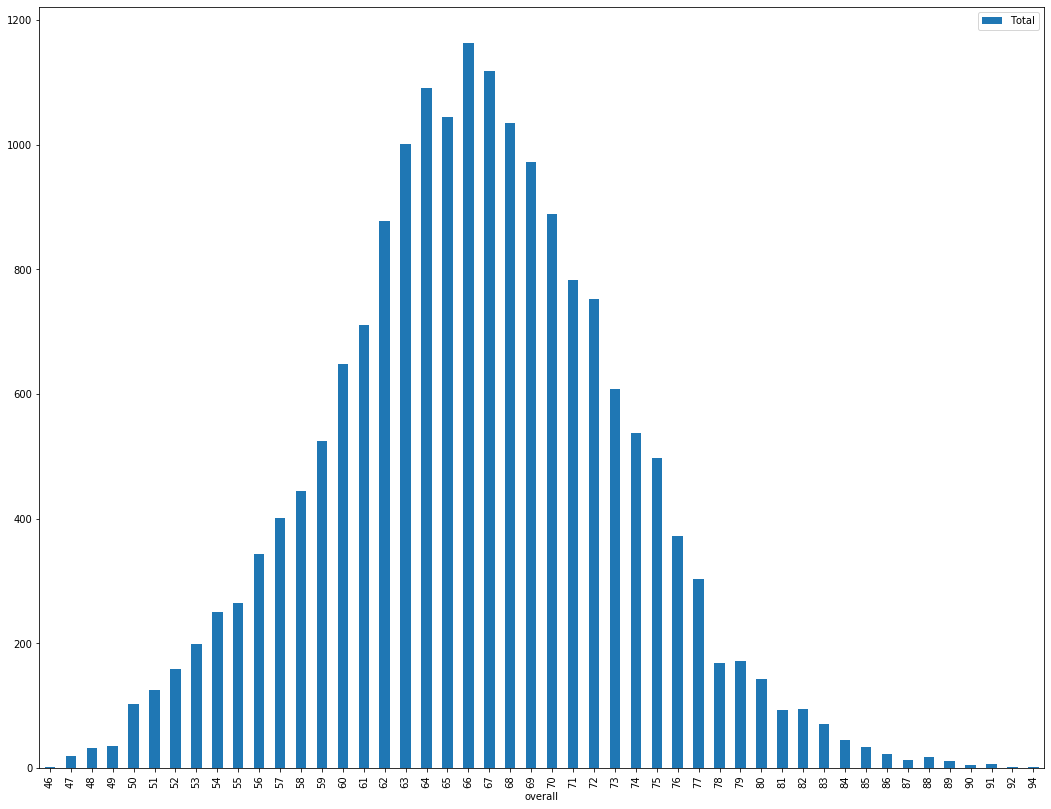

In [57]:
overall.plot(kind ='bar' ,x='overall', y= 'Total', figsize=(18,14))
plt.show()

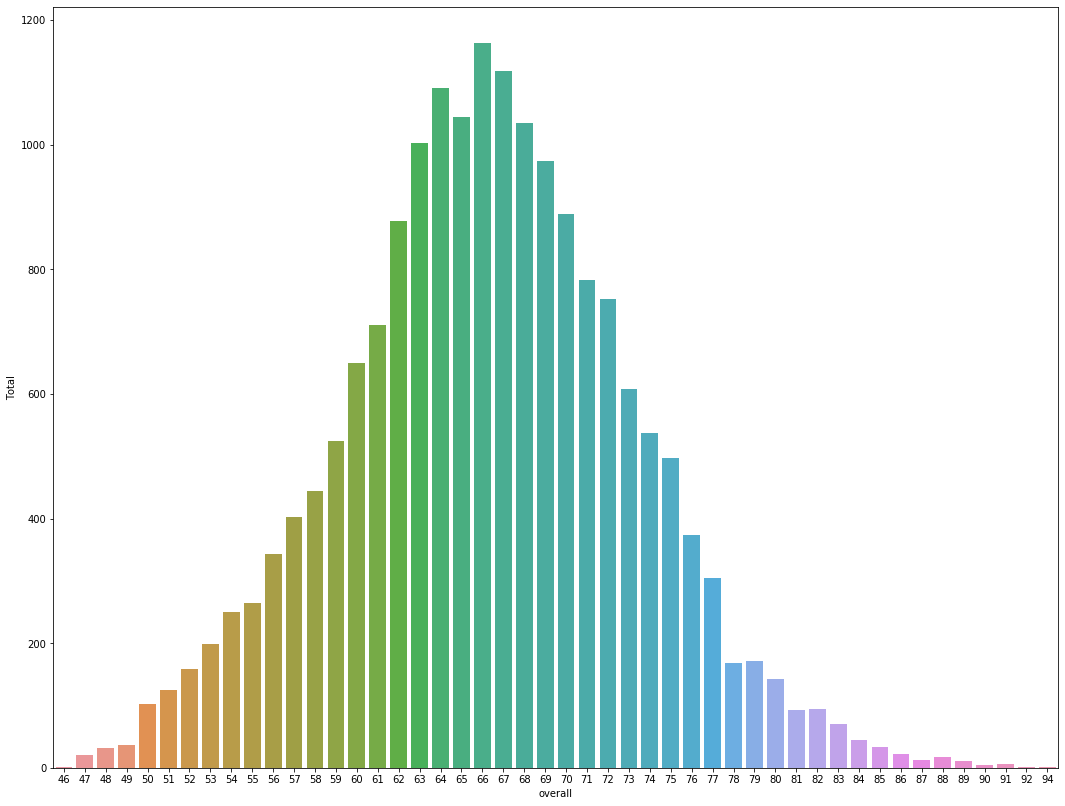

In [58]:
plt.figure(figsize =(18,14))
sb.barplot(data =overall , x='overall', y='Total' )

# Preferred Foot

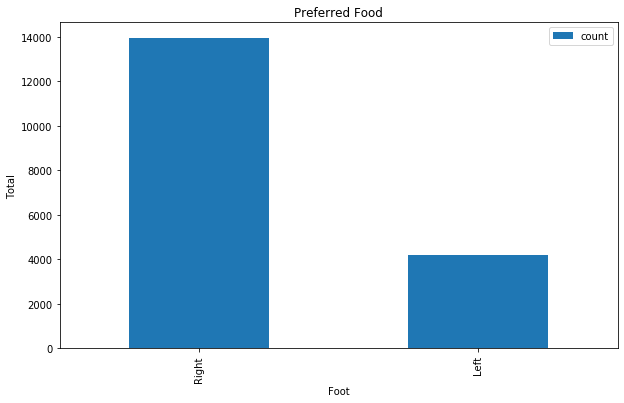

In [59]:
#plt.figure(figsize =(12,8))
foot=pd.DataFrame([fifa['Preferred Foot'].value_counts()]).transpose()
foot.reset_index(inplace=True)
foot.columns=['foot', 'count']
#sb.barplot(data=foot, x='foot',y='count')
foot.plot(kind='bar', x = 'foot', y='count',figsize =(10,6))
plt.xlabel('Foot')
plt.ylabel('Total')
plt.title('Preferred Food')
plt.show()

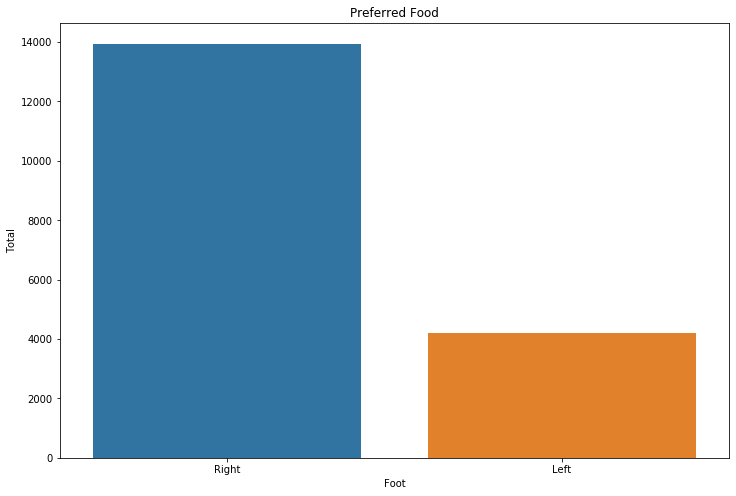

In [60]:
plt.figure(figsize =(12,8))
sb.barplot(data=foot, x='foot',y='count')
plt.xlabel('Foot')
plt.ylabel('Total')
plt.title('Preferred Food')
plt.show()

In [61]:
'''f = fifa['Weight'][1]
fifa['Weight'][4]
r =float(re.findall('(\d+)',f)[0])
r'''

"f = fifa['Weight'][1]\nfifa['Weight'][4]\nr =float(re.findall('(\\d+)',f)[0])\nr"

# Weight Classes

In [62]:
fifa.shape

(18207, 89)

In [63]:
fifa['Weight'].isnull().value_counts()

False    18159
True        48
Name: Weight, dtype: int64

In [64]:
fifa.dropna(subset= ['Weight'] , inplace=True, axis = 0)
fifa.reset_index(drop=True, inplace=True)
fifa['Weight'].isnull().value_counts()

False    18159
Name: Weight, dtype: int64

In [65]:
def convert(e):
    r= re.split('(\d+)', e)    
    kg = float(r[1])*0.45359237
    return kg

In [66]:
fifa['Weight'] = fifa.Weight.apply(convert)
fifa['Weight'].head()

0    72.121187
1    83.007404
2    68.038855
3    76.203518
4    69.853225
Name: Weight, dtype: float64

In [67]:
fifa['Weight'].isnull().value_counts()

False    18159
Name: Weight, dtype: int64

In [68]:
bins = np.linspace(np.min(fifa['Weight']), np.max(fifa['Weight']), 6)
labels = ['light', 'light_medium', 'medium', 'medium_heavy', 'heavy']
bins

array([ 49.8951607 ,  61.96071774,  74.02627478,  86.09183183,
        98.15738887, 110.22294591])

In [69]:
fifa['Weight_class']= pd.cut(fifa['Weight'], bins, labels =labels, include_lowest = True)

In [70]:
fifa[['Weight_class', 'Weight']].head(10)

,Weight_class,Weight
0,light_medium,72.121187
1,medium,83.007404
2,light_medium,68.038855
3,medium,76.203518
4,light_medium,69.853225
5,light_medium,73.935556
6,light_medium,66.224486
7,medium_heavy,86.182550
8,medium,82.100219
9,medium_heavy,87.089735


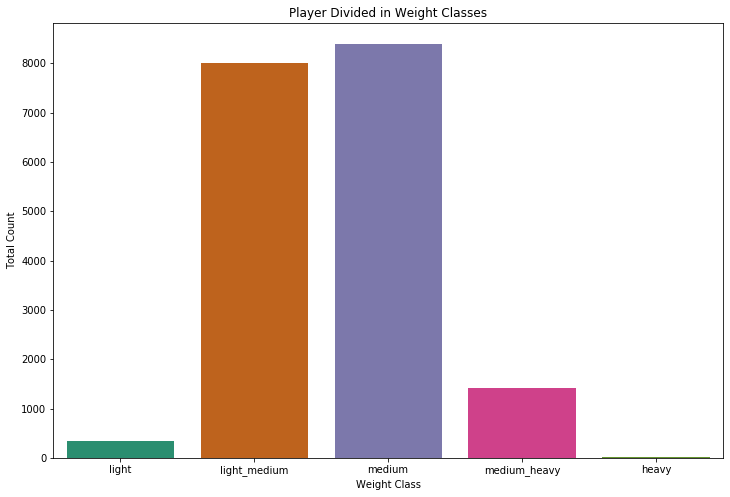

In [71]:
plt.figure(figsize =(12,8))
sb.countplot(fifa['Weight_class'], palette="Dark2")
plt.xlabel('Weight Class')
plt.ylabel('Total Count')
plt.title('Player Divided in Weight Classes')
plt.show()

In [72]:
fifa['Weight_class'].value_counts()

medium          8396
light_medium    8003
medium_heavy    1408
light            333
heavy             19
Name: Weight_class, dtype: int64

In [73]:
print('Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r')

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2,

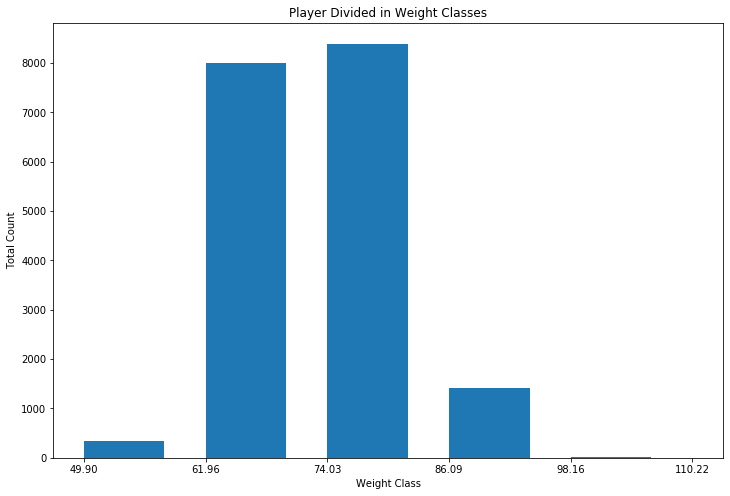

In [90]:
plt.figure(figsize =(12,8))
fifa['Weight'].plot(kind='hist', bins = 5, width=8, xticks= bins )
plt.xlabel('Weight Class')
plt.ylabel('Total Count')
plt.title('Player Divided in Weight Classes')
plt.show()